# #  Togo Solar Data EDA
**Objective**: Clean, profile, and analyze Sierra Leone's solar dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [2]:

# Load data (replace with actual path)
try:
    df = pd.read_csv('../data/togo-dapaong_qc.csv')  
    print("Data loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print("File not found. Check path or download data.")
    df = pd.DataFrame()  

Data loaded successfully. Shape: (525600, 19)


In [3]:
# display the first 10 rows of the dataframe
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,2021-10-25 00:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,2021-10-25 00:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN
7,2021-10-25 00:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5,NaN
8,2021-10-25 00:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5,NaN
9,2021-10-25 00:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5,NaN


In [4]:
# check for missing values in the dataset
df.isna().sum()  # Check for missing values 

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

# ## 2. Summary Statistics & Missing Values

In [5]:
if not df.empty:
    # Basic info
    print("\n📊 Column Dtypes:")
    display(df.dtypes)

    # Numeric summary stats
    print("\n📈 Summary Statistics:")
    display(df.describe())

    # Missing values
    missing = df.isna().sum()
    missing_pct = (missing / len(df)) * 100
    missing_report = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
    print("\n🔍 Missing Values Report:")
    display(missing_report[missing_report['Missing Count'] > 0])

    # Flag high-missing columns (>5%)
    high_missing = missing_report[missing_report['Percentage'] > 5]
    if not high_missing.empty:
        print("\n⚠️ Columns with >5% missing values:")
        display(high_missing)


📊 Column Dtypes:


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


📈 Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN



🔍 Missing Values Report:


,Missing Count,Percentage
Comments,525600,100.0



⚠️ Columns with >5% missing values:


,Missing Count,Percentage
Comments,525600,100.0


# # 3. Outlier Detection & Cleaning

In [6]:
# lets check the columns in the dataset
print("\n🗂️ Columns in the dataset:",df.columns)


🗂️ Columns in the dataset: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [7]:
# outlier detection
num_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    
# Compute Z-scores and flag outliers (|Z|>3)
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"\n🔴 Outliers detected: {outliers.sum()} rows ({outliers.mean()*100:.2f}%)")


🔴 Outliers detected: 9251 rows (1.76%)


In [8]:
# Drop Useless Columns
df = df.drop(columns=['Comments'])  # Drop empty column
# Replace negative values with 0 (physically meaningful)
irradiance_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
df[irradiance_cols] = df[irradiance_cols].clip(lower=0)

 
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[outlier_cols]))
df_clean = df[(z_scores < 3).all(axis=1)]  # Keep only inliers
print(f"Removed {len(df)-len(df_clean)} outliers ({((len(df)-len(df_clean))/len(df))*100:.2f}%)")


Removed 9257 outliers (1.76%)


Time Series Analysis (Daily Patterns)

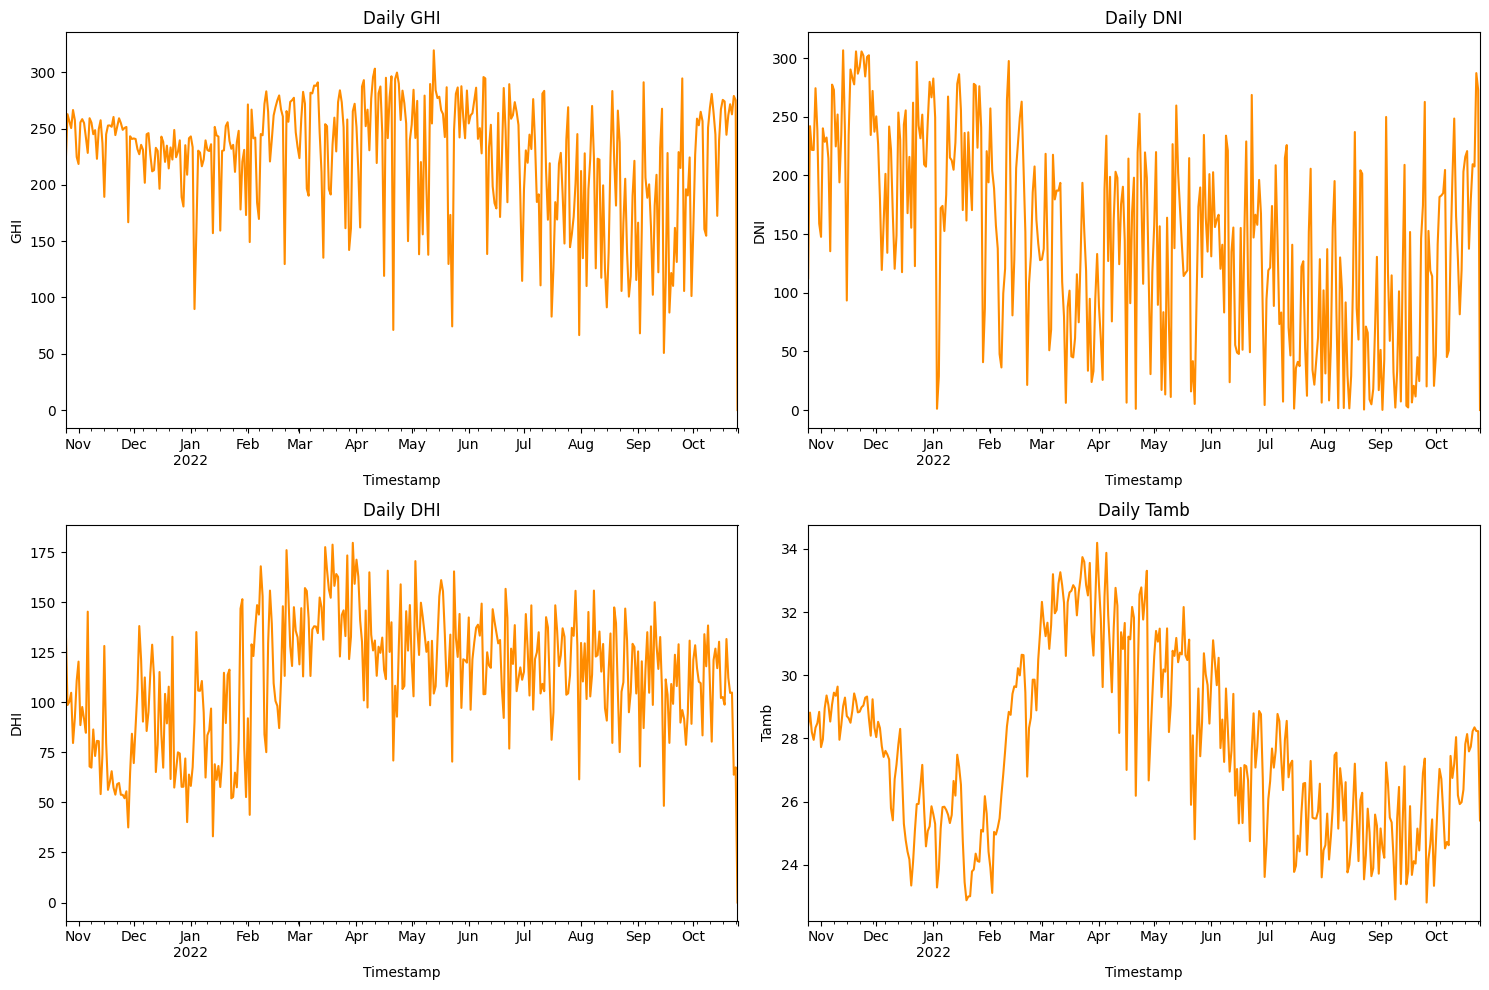

In [9]:

if 'Timestamp' in df_clean.columns:
    # Convert 'Timestamp' to datetime
    df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
    df_clean.set_index('Timestamp', inplace=True)

    # Resample to daily frequency
    daily = df_clean.resample('D').mean()

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
        plt.subplot(2, 2, i+1)
        daily[col].plot(title=f'Daily {col}', color='darkorange')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()
else:
    print("Timestamp column not found. Skipping time series analysis.")

<Figure size 1000x400 with 0 Axes>

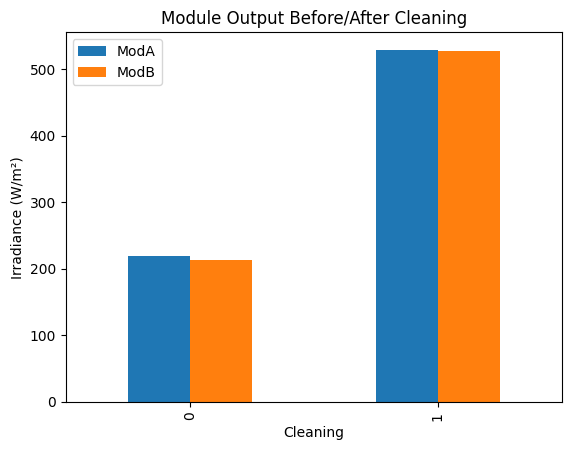

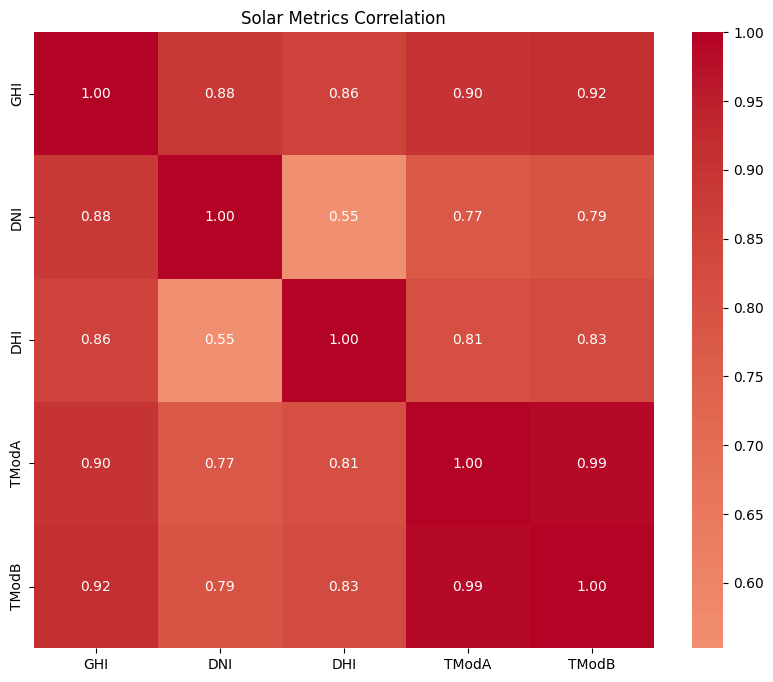

In [11]:
## 5. Cleaning Impact Analysis
if 'Cleaning' in df_clean.columns:
    plt.figure(figsize=(10, 4))
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
    plt.title('Module Output Before/After Cleaning')
    plt.ylabel('Irradiance (W/m²)')
    plt.show()
# ## 6. Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0 ,fmt = ".2f")
plt.title('Solar Metrics Correlation')
plt.show()




In [12]:
# Drop redundant features (keep one from each highly correlated pair)
df_clean = df_clean.drop(columns=['TModA','TModB'])  # removes multicollinearity between as TModA and TModB 
df_clean= df_clean.drop(columns=['ModA', 'ModB'])  # Keep GHI as target
print("Dropped redundant features. Remaining columns:", df_clean.columns.tolist())
# Export Cleaned Data
df_clean.to_csv('../data/togo_clean.csv', index=False)
print("\n Cleaned data saved to '../data/togo_clean.csv'")

Dropped redundant features. Remaining columns: ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation']

 Cleaned data saved to '../data/togo_clean.csv'


Scatter Plots


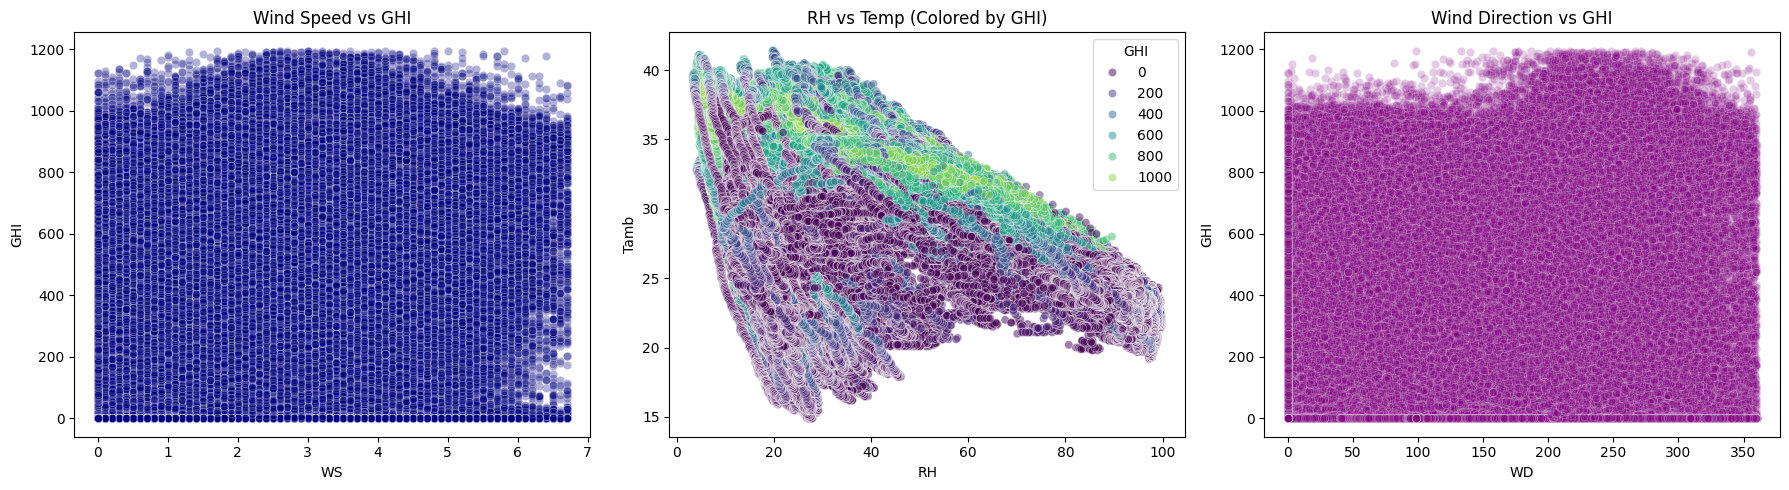

In [13]:

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_clean, x='WS', y='GHI', alpha=0.3, color='navy')
plt.title('Wind Speed vs GHI')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', hue='GHI', 
               palette='viridis', alpha=0.5)
plt.title('RH vs Temp (Colored by GHI)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_clean, x='WD', y='GHI', alpha=0.2, color='purple')
plt.title('Wind Direction vs GHI')
plt.tight_layout()
plt.show()

Wind Analysis (Direction & Speed)

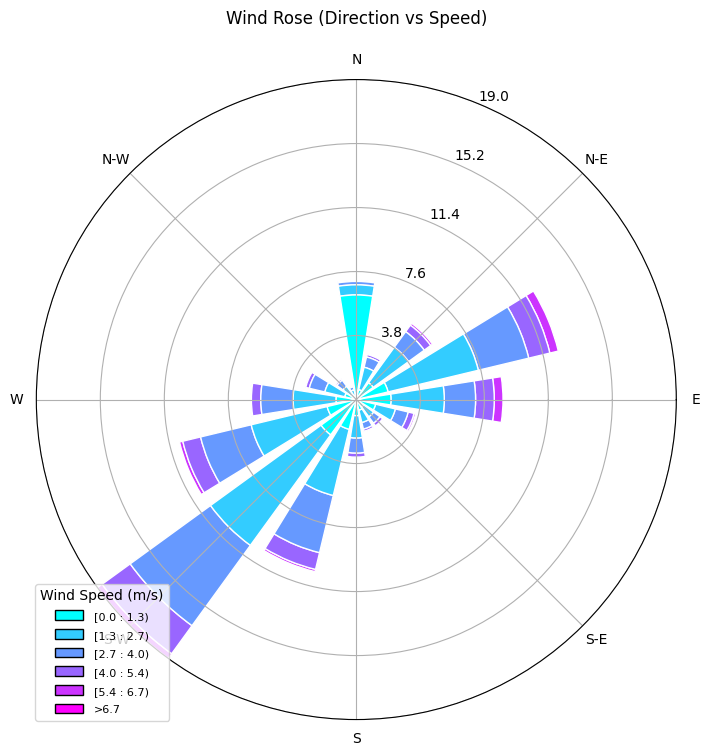

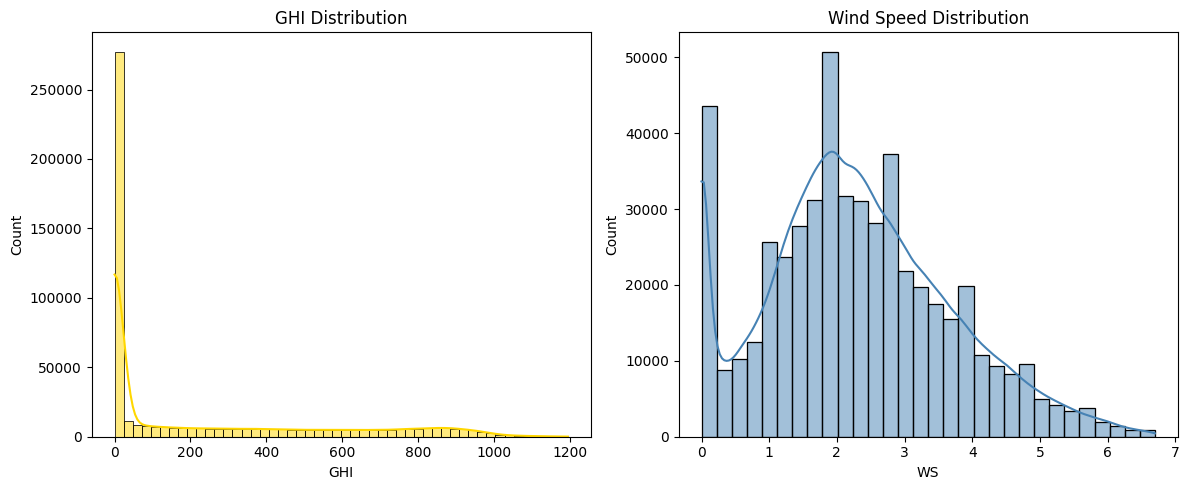

In [14]:
# Wind Rose
from windrose import WindroseAxes
import matplotlib.cm as cm  # Import colormap module

fig = plt.figure(figsize=(12, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, 
       opening=0.8, edgecolor='white', cmap=cm.cool)  # Use cm.cool instead of 'cool'
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose (Direction vs Speed)', pad=40)
plt.show()

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=50, kde=True, color='gold')
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=30, kde=True, color='steelblue')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

 Temperature Analysis

<Figure size 1000x600 with 0 Axes>

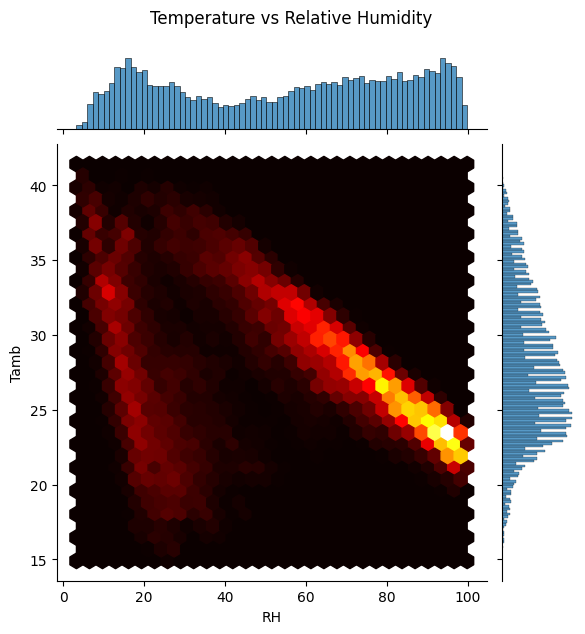

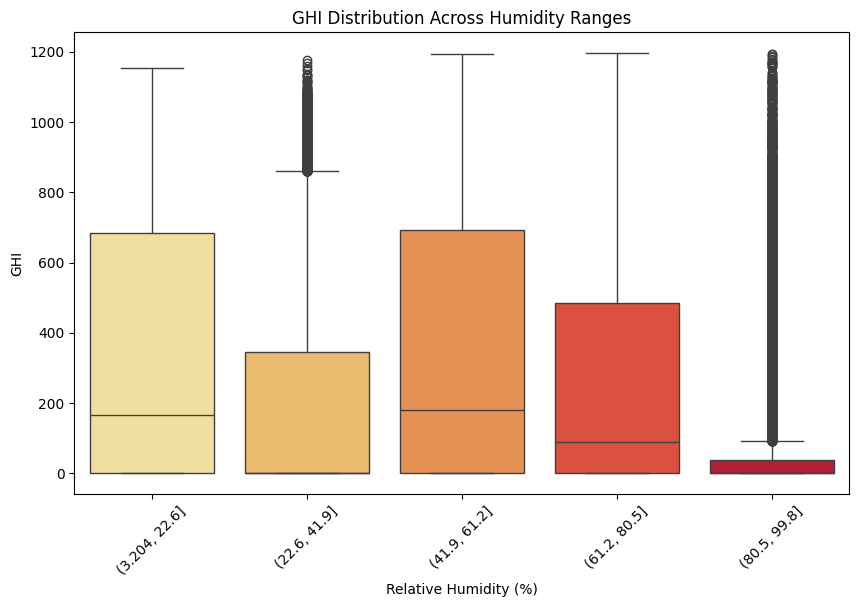

In [15]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df_clean, x='RH', y='Tamb', kind='hex', 
              cmap='hot', gridsize=30)
plt.suptitle('Temperature vs Relative Humidity', y=1.05)
plt.show()

# RH impact on GHI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x=pd.cut(df_clean['RH'], bins=5), y='GHI',
            palette='YlOrRd')
plt.title('GHI Distribution Across Humidity Ranges')
plt.xlabel('Relative Humidity (%)')
plt.xticks(rotation=45)
plt.show()

Bubble Chart for GHI and Tamb


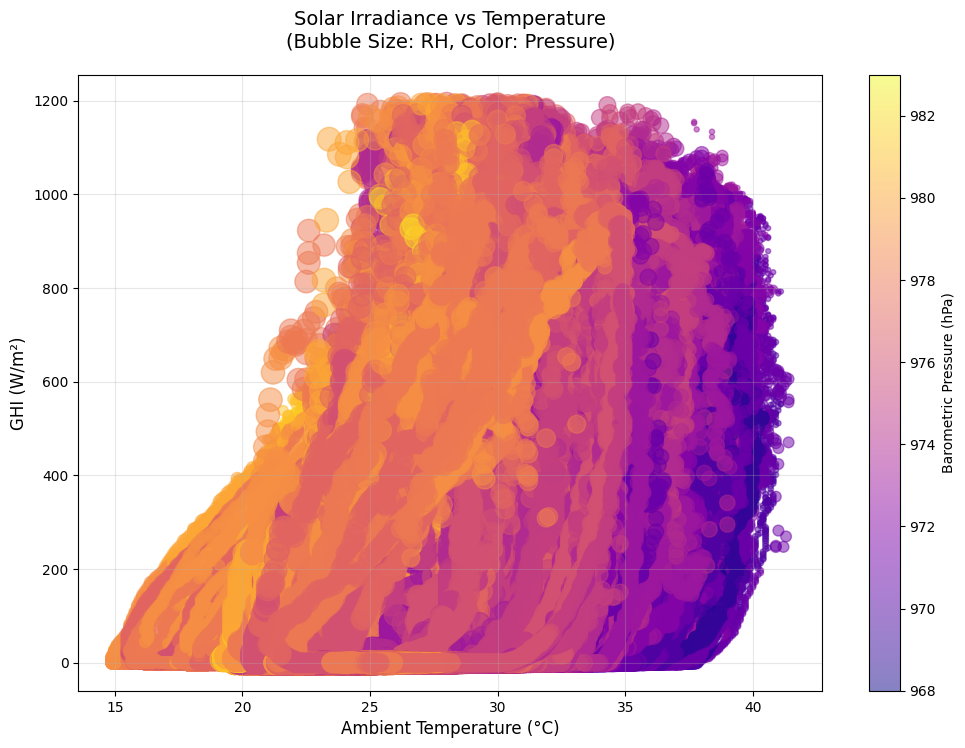

In [16]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    x=df_clean['Tamb'],
    y=df_clean['GHI'],
    s=df_clean['RH']*3,  # Bubble size
    c=df_clean['BP'],    # Color
    alpha=0.5,
    cmap='plasma'
)
plt.colorbar(sc, label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)', fontsize=12)
plt.ylabel('GHI (W/m²)', fontsize=12)
plt.title('Solar Irradiance vs Temperature\n(Bubble Size: RH, Color: Pressure)', 
          pad=20, fontsize=14)
plt.grid(alpha=0.3)
plt.show()